#### Copyright 2017 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

 # Pandas 간단 소개

**학습 목표:**
  * *pandas* 라이브러리의 `DataFrame` 및 `Series` 데이터 구조에 관한 소개 확인하기
  * `DataFrame` 및 `Series` 내의 데이터 액세스 및 조작
  * *pandas* `DataFrame`으로 CSV 데이터 가져오기
  * `DataFrame`의 색인을 다시 생성하여 데이터 셔플

 [*Pandas*](http://Pandas.pydata.org/)는 열 중심 데이터 분석 API입니다. 입력 데이터를 처리하고 분석하는 데 효과적인 도구이며, 여러 ML 프레임워크에서도 *Pandas* 데이터 구조를 입력으로 지원합니다.
*Pandas* API를 전체적으로 소개하려면 길어지겠지만 중요한 개념은 꽤 간단하므로 아래에서 소개하도록 하겠습니다. 전체 내용을 참조할 수 있도록 [*Pandas* 문서 사이트](http://pandas.pydata.org/pandas-docs/stable/index.html)에서 광범위한 문서와 여러 가이드를 제공하고 있습니다.

 ## 기본 개념

다음 행은 *Pandas* API를 가져와서 API 버전을 출력합니다.

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.0.3'

 *Pandas*의 기본 데이터 구조는 두 가지 클래스로 구현됩니다.

  * **`DataFrame`**은 행 및 이름 지정된 열이 포함된 관계형 데이터 테이블이라고 생각할 수 있습니다.
  * **`Series`**는 하나의 열입니다. `DataFrame`에는 하나 이상의 `Series`와 각 `Series`의 이름이 포함됩니다.

데이터 프레임은 데이터 조작에 일반적으로 사용하는 추상화입니다. [Spark](https://spark.apache.org/) 및 [R](https://www.r-project.org/about.html)에 유사한 구현이 존재합니다.

 `Series`를 만드는 한 가지 방법은 `Series` 객체를 만드는 것입니다. 예를 들면 다음과 같습니다.

In [0]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

 `DataFrame` 객체는 `string` 열 이름과 매핑되는 'dict'를 각각의 `Series`에 전달하여 만들 수 있습니다. `Series`의 길이가 일치하지 않는 경우, 누락된 값은 특수 [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 값으로 채워집니다. 예를 들면 다음과 같습니다.

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

city_names, 'Population': poppd.DataFrame({ 'City name': ulation })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


 하지만 대부분의 경우 전체 파일을 `DataFrame`으로 로드합니다. 다음 예는 캘리포니아 부동산 데이터가 있는 파일을 로드합니다. 다음 셀을 실행하여 데이터에 로드하고 기능 정의를 만들어 보세요.

In [3]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 위의 예에서는 `DataFrame.describe`를 사용하여 `DataFrame`에 관한 흥미로운 통계를 보여줍니다. 또 다른 유용한 함수는 `DataFrame.head`로, `DataFrame` 레코드 중 처음 몇 개만 표시합니다.

In [4]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


 *Pandas*의 또 다른 강력한 기능은 그래핑입니다. 예를 들어 `DataFrame.hist`를 사용하면 한 열에서 값의 분포를 빠르게 검토할 수 있습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75b394f828>]],
      dtype=object)

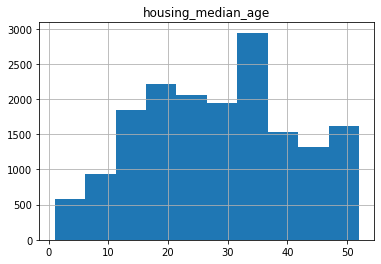

In [5]:
california_housing_dataframe.hist('housing_median_age')

 ## 데이터 액세스

익숙한 Python dict/list 작업을 사용하여 `DataFrame` 데이터에 액세스할 수 있습니다.

In [6]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [7]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [8]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


 또한 *Pandas*는 고급 [색인 생성 및 선택](http://Pandas.pydata.org/Pandas-docs/stable/indexing.html) 기능을 위한 풍부한 API를 제공합니다. 이 내용은 너무 광범위하므로 여기에서 다루지 않습니다.

 ## 데이터 조작

Python의 기본 산술 연산을 `Series`에 적용할 수도 있습니다. 예를 들면 다음과 같습니다.

In [9]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

 [NumPy](http://www.numpy.org/)는 유명한 계산과학 툴킷입니다. *Pandas* `Series`는 대부분의 NumPy 함수에 인수로 사용할 수 있습니다.

In [10]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 더 복잡한 단일 열 변환에는 `Series.apply`를 사용할 수 있습니다. Python [map 함수](https://docs.python.org/2/library/functions.html#map)처럼, 
`Series.apply`는 인수로 [lambda 함수](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)를 허용하며, 이는 각 값에 적용됩니다.

아래의 예에서는 `인구`가 백만 명을 초과하는지 나타내는 새 `Series`를 만듭니다.

In [11]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
`DataFrames` 수정 역시 간단합니다. 예를 들어 다음 코드는 기존 `DataFrame`에 두 개의 `Series`를 추가합니다.

In [12]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 ## 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [0]:
# Your code here

 ### 해결 방법

해결 방법을 보려면 아래를 클릭하세요.

In [13]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 ## 색인
`Series`와 `DataFrame` 객체 모두 식별자 값을 각 `Series` 항목이나 `DataFrame` 행에 할당하는 `index` 속성을 정의합니다. 

기본적으로 생성 시 *Pandas*는 소스 데이터의 순서를 나타내는 색인 값을 할당합니다. 생성된 이후 색인 값은 고정됩니다. 즉, 데이터의 순서가 재정렬될 때 변하지 않습니다.

In [14]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
cities.index

RangeIndex(start=0, stop=3, step=1)

 `DataFrame.reindex`를 호출하여 수동으로 행의 순서를 재정렬합니다. 예를 들어 다음은 도시 이름을 기준으로 분류하는 것과 효과가 같습니다.

In [16]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


 색인 재생성은 `DataFrame`을 섞기(임의 설정하기) 위한 좋은 방법입니다. 아래의 예에서는 배열처럼 된 색인을 NumPy의 `random.permutation` 함수에 전달하여 값을 섞습니다. 이렇게 섞인 배열로 `reindex`를 호출하면 `DataFrame` 행도 같은 방식으로 섞입니다.
다음 셀을 여러 번 실행해 보세요.

In [19]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 자세한 정보는 [색인 문서](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects)를 참조하세요.

 ## 실습 #2

`reindex` 메서드는 원래 `DataFrame`의 색인 값에 없는 색인 값을 허용합니다. 메서드를 실행해보고 이런 값을 사용하면 어떤 결과가 나오는지 확인해보세요. 왜 이런 값이 허용된다고 생각하나요?

In [0]:
# Your code here

 ### 해결 방법

해결 방법을 보려면 아래를 클릭하세요.

 `reindex` 입력 배열에 원래 `DataFrame` 색인 값에 없는 값을 포함하면 `reindex`가 이 \'누락된\' 색인에 새 행을 추가하고 모든 해당 열을 `NaN` 값으로 채웁니다.

In [20]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


 색인은 보통 실제 데이터에서 가져온 문자열이기 때문에 이 동작이 바람직합니다([*Pandas* 색인 재생성 문서](http://Pandas.pydata.org/Pandas-docs/stable/generated/Pandas.DataFrame.reindex.html)에서 색인 값이 브라우저 이름인 예제 참조).

이 경우 \'누락된\' 색인을 허용하면 외부 목록을 사용하여 쉽게 색인을 다시 생성할 수 있으므로, 입력 처리에 대해 걱정하지 않아도 됩니다.